In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from lca import LCA
from sklearn.metrics import silhouette_score

## Prepare CB startup category groups data

In [ ]:
data = pd.read_csv('funded_firms_info.csv',encoding='latin-1')
data

In [ ]:
data = data[['org_uuid','category_groups_list']]
print(data.shape)

In [ ]:
data['category_groups_list'] = data['category_groups_list'].str.replace("\n","")
data['category_groups_list'] = data['category_groups_list'].str.replace('" "',',')
data['category_groups_list'] = data['category_groups_list'].str.replace("' '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("' \"",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("\" '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("[","")
data['category_groups_list'] = data['category_groups_list'].str.replace("]","")
data['category_groups_list'] = data['category_groups_list'].str.replace("'","")
data['category_groups_list'] = data['category_groups_list'].str.replace('"','')
data['category_groups_list'] = data['category_groups_list'].str.split(',')
data

In [ ]:
data = data.explode('category_groups_list')
data['category_groups_list'] = data['category_groups_list'].str.strip()
data = data.set_index('org_uuid')
data = data[data['category_groups_list']!='']
data

In [ ]:
columns = list(pd.get_dummies(data['category_groups_list']).columns)
columns

In [ ]:
data = pd.get_dummies(data['category_groups_list']).groupby(level=0).max()
data

In [ ]:
data[data.sum(axis=1)==0] ## checking all organizations have at least one label

In [ ]:
data_np = np.array(data.astype(int))
data_np.shape

## Select number of classes: First time silhouette score is high enough and BIC appears to level off

In [ ]:
ks = [45,50,55,60,65,70,75,80,85,90,95,100]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)


45 670535.4577232673 639766.8109437636 30768.646779503673
Average silhouette: 0.163
Mean max posterior: 0.851
Posterior certainty: 0.891
0.4133570684842949
50 673245.6254797938 639495.7772705582 33749.848209235584
Average silhouette: 0.155
Mean max posterior: 0.831
Posterior certainty: 0.884
0.45340760082522663
55 670745.5101615541 637860.8190482872 32884.69111326686
Average silhouette: 0.165
Mean max posterior: 0.836
Posterior certainty: 0.890
0.44178476903072794
60 672380.7291231427 636204.7283238256 36176.00079931703
Average silhouette: 0.164
Mean max posterior: 0.820
Posterior certainty: 0.881
0.48600140728064306
65 667435.8563195065 634007.8137532683 33428.042566238204
Average silhouette: 0.166
Mean max posterior: 0.833
Posterior certainty: 0.892
0.449084347826241
70 672889.994605674 633774.609171312 39115.38543436199
Average silhouette: 0.170
Mean max posterior: 0.809
Posterior certainty: 0.876
0.5254901575999206
75 672196.3006245359 632635.9811668603 39560.31945767556
Average si

In [12]:
ks = [95,100,60,61,62,63,64,65,66,67,68]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)

95 670524.5633454116 630228.1292297585 40296.43411565304
Average silhouette: 0.177
Mean max posterior: 0.806
Posterior certainty: 0.881
0.5413567900505619
100 671758.220491539 629300.8590725767 42457.361418962246
Average silhouette: 0.178
Mean max posterior: 0.794
Posterior certainty: 0.876
0.5703874646770994
60 672380.7291231427 636204.7283238256 36176.00079931703
Average silhouette: 0.164
Mean max posterior: 0.820
Posterior certainty: 0.881
0.48600140728064306
61 671961.5833894338 635761.3885638815 36200.19482555229
Average silhouette: 0.166
Mean max posterior: 0.822
Posterior certainty: 0.882
0.4863264384440026
62 671745.5436863462 635442.162605133 36303.38108121313
Average silhouette: 0.167
Mean max posterior: 0.821
Posterior certainty: 0.882
0.4877126797890104
63 670688.7821804066 635196.6088688168 35492.17331158987
Average silhouette: 0.167
Mean max posterior: 0.826
Posterior certainty: 0.885
0.47681462272220415
64 668254.0650508634 634471.722173998 33782.34287686541
Average silh

KeyboardInterrupt: 

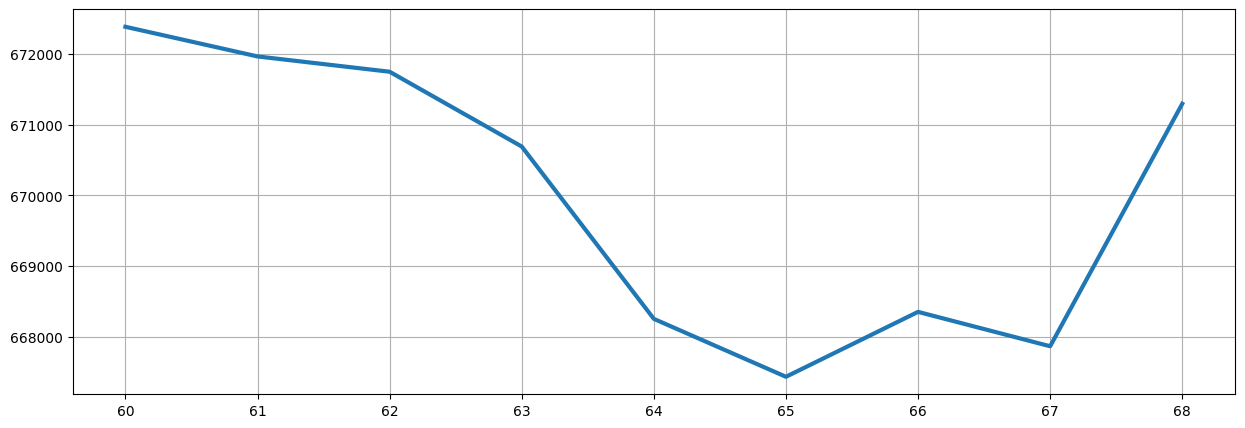

In [17]:
ks = [60,61,62,63,64,65,66,67,68]
_,ax = plt.subplots(figsize=(15,5))
ax.plot(ks, icls[2:], linewidth=3)
ax.grid(True)

## Train LCA model with the optimal number of classes

In [18]:
lca = LCA(n_components=65, tol=10e-3, max_iter=300)

In [19]:
%%time
lca.fit(data_np)

CPU times: user 57min 10s, sys: 9min 15s, total: 1h 6min 26s
Wall time: 1h 6min 29s


In [ ]:
display(lca.__dict__)

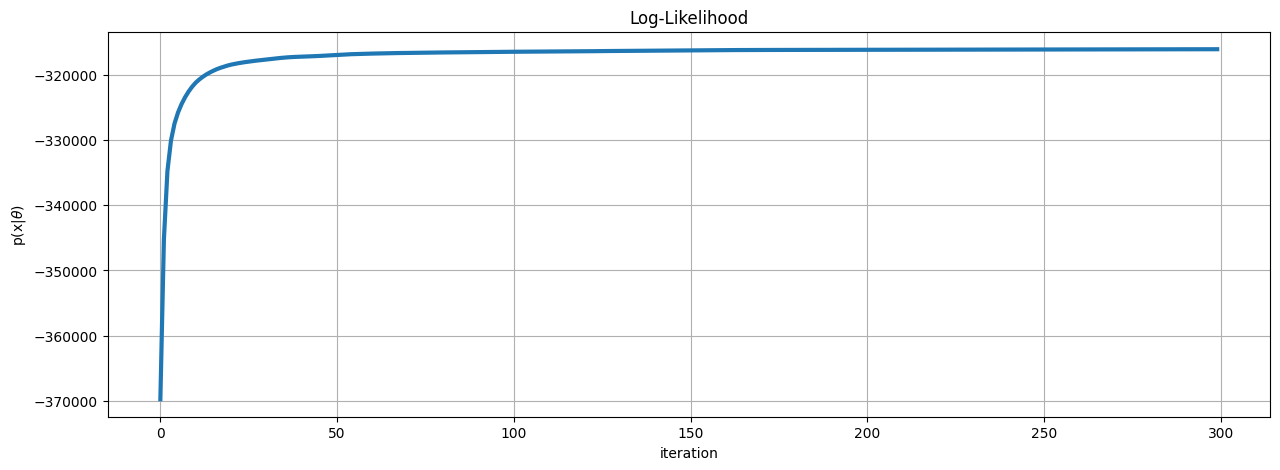

In [25]:
## CONVERGENCE GRAPH: NUMBER OF ITERATIONS AND LIKELIHOOD
_,ax = plt.subplots(figsize=(15,5))
ax.plot(lca.ll_[1:], linewidth=3)
ax.set_title("Log-Likelihood")
ax.set_xlabel("iteration")
ax.set_ylabel(r"p(x|$\theta$)")
ax.grid(True)

In [26]:
## PLOT THE CATEGORY GROUP DISTRIBUTIONS OF THE LATENT CLASSES
_,axs = plt.subplots(nrows=lca.theta.shape[0], figsize=(15,lca.theta.shape[0]*10))
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.bar(range(len(columns)),lca.theta[i,:])
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns, rotation="vertical")

In [27]:
labels = lca.predict(data_np)

In [ ]:
{x:list(labels).count(x) for x in set(labels)}

In [46]:
outputs = lca.__dict__
outputs['labels'] = labels.tolist()
outputs['weight'] = outputs['weight'].tolist()
outputs['theta'] = outputs['theta'].tolist()
outputs['responsibility'] = outputs['responsibility'].tolist()
outputs['columns'] = columns
outputs['org_uuids'] = data.index.tolist()